In [123]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [124]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [125]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [126]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [127]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [128]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [129]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [130]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [131]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

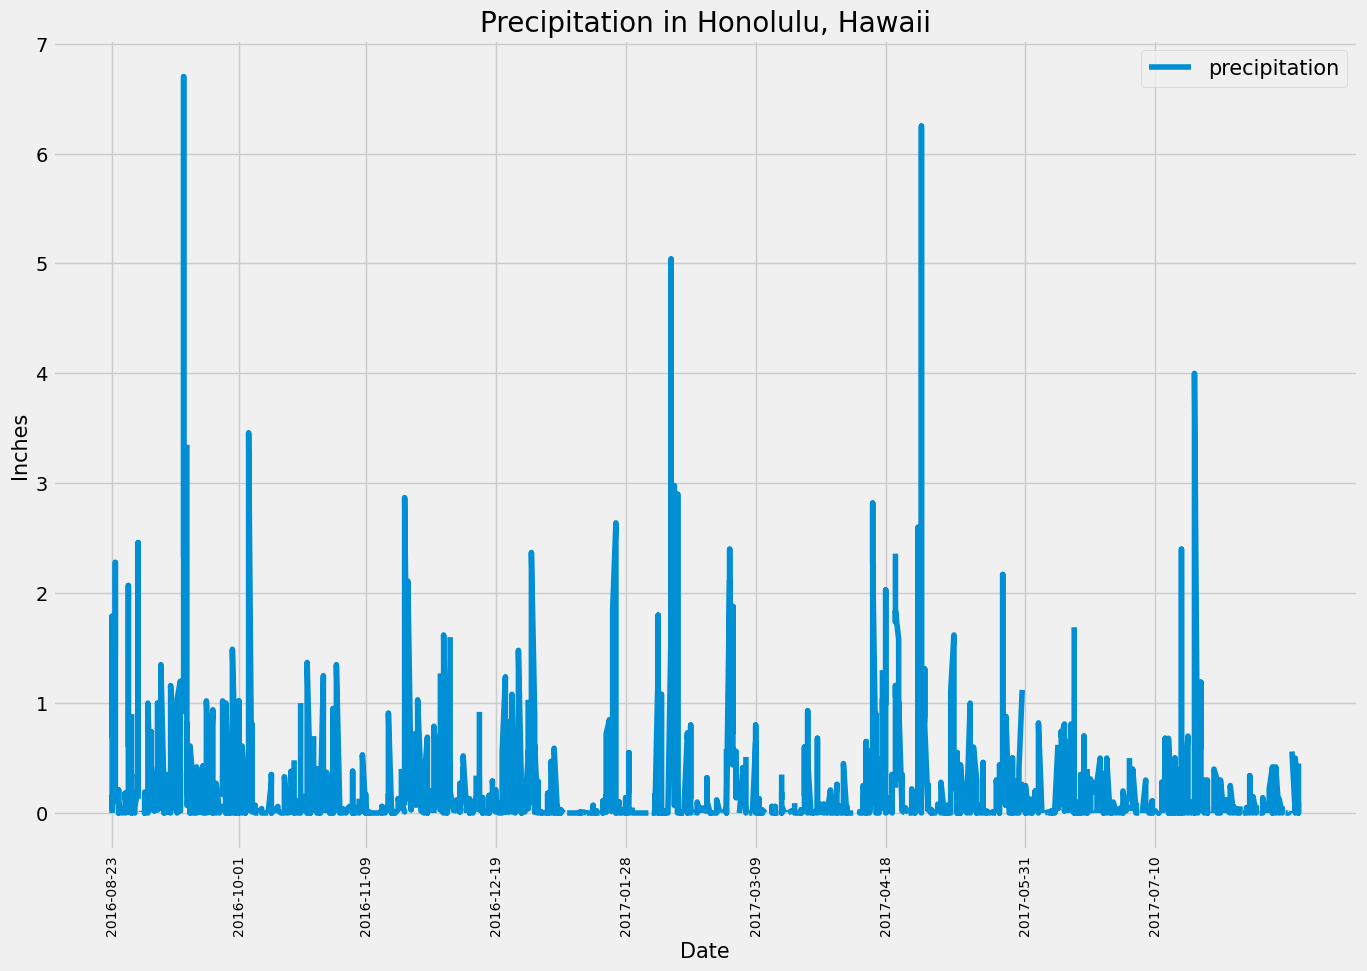

In [132]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results)

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('date').set_index('date')
prcp_df_sorted
#Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15, 10))
plt.plot(prcp_df_sorted.index, prcp_df_sorted['prcp'])

xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 
plt.xticks(xloc, rotation='vertical',fontsize=10)

plt.title('Precipitation in Honolulu, Hawaii', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.legend(['precipitation'], loc="upper right",fontsize=15)


In [133]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [134]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [135]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
active_stations


('USC00519281', 2772)

In [136]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stat = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter_by(station='USC00519281').first()
stats = []

for item in station_stat:
    stats.append(item)

print(f'The lowest temperature was {stats[0]} degrees\n\
The highest temperature was {stats[1]} degrees\n\
The average temperature was {round(stats[2],2)} degrees')

The lowest temperature was 54.0 degrees
The highest temperature was 85.0 degrees
The average temperature was 71.66 degrees


Text(0.5, 1.0, 'Observed Temperatures at Station USC00519281')

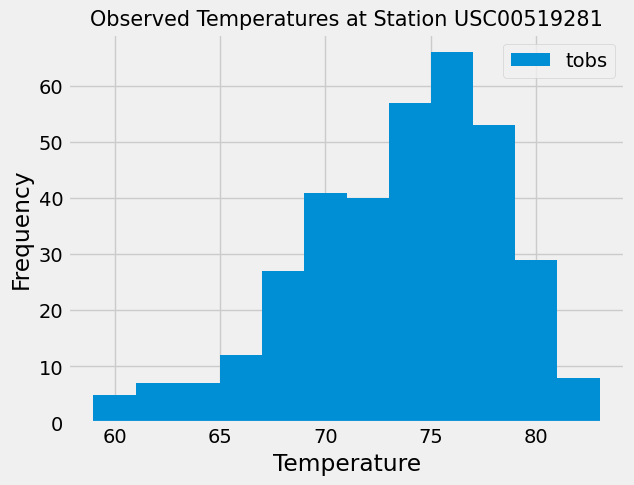

In [137]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_stat = session.query(measurement.tobs).filter_by(station='USC00519281').filter(measurement.date >= '2016-08-23').all()
station_stat_df = pd.DataFrame(station_stat)
station_stat_df.plot.hist(bins=12, alpha=1)
plt.xlabel('Temperature')
plt.title('Observed Temperatures at Station USC00519281', fontsize=15)

# Close session

In [138]:
# Close Session
session.close()